
# WeRateDogs Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Gathering</a></li>
<li><a href="#Assessing">Assessing</a></li>
<li><a href="#Cleaning">Cleaning</a></li>
</ul>

### Gather data 
    Online data (Twitter and URL)
    Stored files(txt and csv files)
    

In [1]:
import pandas as pd
import json
import csv
import re
import tweepy
from tweepy import OAuthHandler
import time
from urllib import request
import matplotlib 

In [2]:
#download image prediction file in url programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
 
def download_txturl(txturl):
    response = request.urlopen(txturl)
    txt = response.read()
    txtstr = str(txt)
    lines = txtstr.split('\\n')
    dest = r'image_predictions.tsv'
    op = open(dest, 'w')
    for line in lines:
        op.write(line + '\n')
    op.close()

download_txturl(url)


In [3]:
consumer_key = 'jbL7N3K4eXgD1zhDfeS2TcnFr'
consumer_secret = 'XeIpJqZ4i8WAolHVCNBqGtILZKY1J0TVJw8GkpW9jDRthls1qn'
access_token = '495295426-3dc2rEDWSI8AX8NxYCpIRV9tk83EwocP7RzbraDC'
access_token_secret = 'zsulnNzoCcHRURBOkfVkb1tLcJPfYinSwfJBpn9Nam1FV'


# search_favorites(consumer_key, consumer_secret, access_token, access_token_secret):
#create authentication for accessing twitter
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#initialize Tweepy API
api = tweepy.API(auth, wait_on_rate_limit =True, wait_on_rate_limit_notify = True)
tweet_ids = df_archive.tweet_id


NameError: name 'df_archive' is not defined

In [ ]:
count = 0
fails_dict = {}
#save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    #loop through each tweet id filtered by the given archive file and write to outfile
    for tweet_id in tweet_ids:
        count += 1        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass

In [4]:
df_new = pd.DataFrame(columns=['tweet_id', 'text','retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        text = status['full_text']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_new = df_new.append(pd.DataFrame([[tweet_id, text, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'text', 'retweet_count', 'favorite_count']))
df_new = df_new.reset_index(drop=True)

In [5]:
df_new.head()

,tweet_id,text,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8193,37559
1,892177421306343426,This is Tilly. She's just checking pup on you....,6060,32284
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4008,24325
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8349,40908
4,891327558926688256,This is Franklin. He would like you to stop ca...,9041,39096


In [6]:
df_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
df_image = pd.read_csv('image-predictions-3.tsv',  delimiter='\t')

### Assess


#### Quality
##### archive table
- Missing data for retweets and likes
- Incorrect ratings data and unnusable values
    - strange values
    - 75 should be 9.75
    - 1776, 420, high values will skew analysis
- Erroneous data types (ID, ratings, favorite_count, retweet_count, timestamp) 
- Unnecessary columns
- Rows without images need to be removed
- Retweets and replies need to be removed


##### image prediction table
- results that are not dogs should be removed
- Erroneous datatypes (tweet_id)
- Lowercase given names and surnames

#### Tidiness
##### archive table
- There should be one column for dog stages
- There should be one column for dog breed and it should be connected to the archive table
- There should be one columns for rating 



## Clean

### Missing data:
    The likes and retweet counts will be added. The archive and new dataframes are combined with an inner join. This will exclude values from the archive that are no longer present. This will be easier if the tweet IDs are strings. 
    

In [7]:
df_new2 = df_new.copy()
df_archive2 = df_archive.copy()
df_image2 = df_image.copy()

In [8]:
df_new2.tweet_id = df_new2['tweet_id'].astype('str')
df_archive2.tweet_id = df_archive2.tweet_id.astype('str')
df_new2.head()

,tweet_id,text,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8193,37559
1,892177421306343426,This is Tilly. She's just checking pup on you....,6060,32284
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4008,24325
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8349,40908
4,891327558926688256,This is Franklin. He would like you to stop ca...,9041,39096


In [271]:
df_clean = df_archive2.merge(df_new2, how= 'inner', on = 'tweet_id')
df_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_y,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,8193,37559
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....,6060,32284
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,4008,24325


### Unnecessary rows and columns


#### Retweets and rows are removed by removing rows that contain a value in retweet status and in reply to columns and those that do not contain photos. 

In [272]:
df_clean = df_clean[(df_clean['retweeted_status_id'].isna()) & (df_clean['in_reply_to_status_id'].isna())]


In [273]:
# the old text will be replaced by my newly collected text as it will be used later and I want to be sure of its correctness
df_clean.drop('text_x', axis = 1, inplace = True)

In [274]:
df_clean.rename(columns = {'text_y': 'text'}, inplace = True)

In [275]:
df_clean = df_clean[df_clean.text.str.contains("https://")]

In [276]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,8193,37559
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....,6060,32284
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,4008,24325
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal...,8349,40908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,This is Franklin. He would like you to stop ca...,9041,39096


#### Unnecessary columns are removed.

In [277]:
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_denominator', 'in_reply_to_status_id', 'in_reply_to_user_id'],  axis =1, inplace = True )

In [278]:
# check for any remaing text columns containing RT. The resulting rows are not retweets.
df_clean[df_clean.text.str.contains('RT ')]

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,text,retweet_count,favorite_count
1268,708400866336894977,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",https://vine.co/v/iHFqnjKVbIQ,12,None,None,None,None,None,RT if you are as ready for summer as this pup ...,10621,16523
1632,683515932363329536,2016-01-03 05:11:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",https://vine.co/v/ibvnzrauFuV,11,None,None,None,None,None,HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT...,3075,7617
1841,675489971617296384,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/675489971...,10,None,None,None,None,None,RT until we find this dog. Clearly a cool dog ...,621,1322
1972,672622327801233409,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/672622327...,12,None,None,None,pupper,None,This lil pupper is sad because we haven't foun...,500,1305


#### Stage column is created by combining the stage columns. They are then removed.

In [279]:
df_clean['stage'] = df_clean.text.str.findall(r'(doggo|floofer|pupper|puppo)')


In [280]:
df_clean.stage

0             []
1             []
2             []
3             []
4             []
5             []
6             []
7             []
8             []
9        [doggo]
10            []
11            []
12       [puppo]
13            []
14       [puppo]
15            []
16            []
17            []
18            []
19            []
20            []
21            []
22            []
23            []
24            []
25            []
26            []
27            []
28      [pupper]
30            []
          ...   
2307          []
2308          []
2309          []
2310          []
2311          []
2312          []
2313          []
2314          []
2315          []
2316          []
2317          []
2318          []
2319          []
2320          []
2321          []
2322          []
2323          []
2324          []
2325          []
2326          []
2327          []
2328          []
2329          []
2330          []
2331          []
2332          []
2333          []
2334          

In [281]:
# the new stage column is a list. The few columns with double entries are separated with a comma and all values become strings. 
df_clean['stage'] = df_clean['stage'].str.join(',')


In [282]:
#test
df_clean.stage.value_counts()

                        1738
pupper                   229
doggo                     75
puppo                     27
pupper,pupper              7
doggo,pupper               5
floofer                    4
puppo,doggo                2
pupper,doggo,doggo         1
pupper,pupper,pupper       1
pupper,doggo               1
Name: stage, dtype: int64

In [283]:
df_clean.stage = df_clean.stage.str.replace(',', '/')

In [284]:
#replecated stages are removed
df_clean['stage'].replace('pupper/pupper', 'pupper', inplace =True) 
df_clean['stage'].replace('pupper/doggo/doggo', 'pupper/doggo', inplace = True) 
df_clean['stage'].replace('pupper/pupper/pupper', 'pupper', inplace = True) 

Remove columns

In [319]:
df_clean2 = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1)

In [320]:
df_clean.stage.value_counts()

                1738
pupper           237
doggo             75
puppo             27
doggo/pupper       5
floofer            4
pupper/doggo       2
puppo/doggo        2
Name: stage, dtype: int64

### Correction of ratings
#### The ratings are very important to the analysis. The text is queried to recollect the ratings. 

In [321]:
#A regular expression is used to find all ratings
df_clean2['rating'] = df_clean2['text'].str.findall(r'(\d+/10)')
df_clean2.rating.value_counts()

[12/10]                 483
[10/10]                 423
[11/10]                 411
[13/10]                 286
[9/10]                  152
[8/10]                   96
[7/10]                   50
[14/10]                  39
[5/10]                   32
[6/10]                   32
[3/10]                   19
[4/10]                   14
[]                       12
[2/10]                    9
[1/10]                    4
[10/10, 7/10]             3
[11/10, 8/10]             2
[10/10, 4/10]             2
[4/10, 13/10]             1
[75/10]                   1
[420/10]                  1
[10/10, 10/10]            1
[10/10, 7/10, 12/10]      1
[8/10, 11/10]             1
[5/10, 8/10]              1
[0/10]                    1
[10/10, 11/10]            1
[27/10]                   1
[9/10, 2/10]              1
[26/10]                   1
[12/10, 11/10]            1
[11/10, 10/10]            1
[10/10, 6/10]             1
[5/10, 10/10]             1
[10/10, 5/10]             1
[1776/10]           

In [322]:
# rows with multiple ratings for no ratings are removed

df_clean2 = df_clean2[(df_clean2['rating'].str.len() < 2) & (df_clean2['rating'].str.len() > 0)]
df_clean2.head(1)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,text,retweet_count,favorite_count,stage,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,Phineas,This is Phineas. He's a mystical boy. Only eve...,8193,37559,,[13/10]


In [323]:
#the value is selected from the list so that it is no more in list format
df_clean2['rating'] = df_clean2['rating'].apply(lambda x: x[0])

In [324]:
df_clean.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,text,retweet_count,favorite_count,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,8193,37559,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....,6060,32284,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,4008,24325,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal...,8349,40908,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None,This is Franklin. He would like you to stop ca...,9041,39096,


In [325]:
# The rating column is split again to extract the numerator 
#df_clean2.rating = df_clean2.rating.str.split('/')

In [326]:
# The numerator is selected
#df_clean2['rating'] = df_clean2['rating'].apply(lambda x: x[0:2])
df_clean2.rating = df_clean2['rating'].str.extract('(^\d+)')

In [327]:
df_clean2.rating = df_clean2.rating.astype(float)

In [328]:
# was curious about the differences between my rating results and the given rating result. 
df_clean2.query('rating != rating_numerator')

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,text,retweet_count,favorite_count,stage,rating
1050,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/740373189...,9,None,"After so many requests, this is Bretagne. She ...",13988,36059,,14.0
1147,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/722974582...,4,None,Happy 4/20 from the squad! 13/10 for all https...,1641,4220,,13.0
1184,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/716439118...,50,Bluebert,This is Bluebert. He just saw that both #Final...,219,2439,,11.0
1644,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/682962037...,7,Darrel,This is Darrel. He just robbed a 7/11 and is i...,17583,38245,,10.0
2316,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666287406...,1,an,This is an Albanian 3 1/2 legged Episcopalian...,63,142,,9.0


In [329]:
#I am now comfortable removing the rating numerator column
df_clean2.drop('rating_numerator', axis =1, inplace =True)

In [330]:
df_clean2 = df_clean2.query('rating <20')

### Make one column for breeds


In [331]:
#new data frames are created that will designate the most likely dog breed for each tweet. Predictions where no result was a 
#dog breed will be removed and the breed collumn will be a null value for the tweets with no resonable prediction. 
df_1 = df_image2.query('p1_dog == True')
df_2 = df_image2.query('p1_dog != True & p2_dog == True')
df_3 = df_image2.query('p1_dog != True & p2_dog != True & p3_dog == True')

df_1['breed'] = df_1['p1']
df_2['breed'] = df_2['p2']
df_3['breed'] = df_3['p3']
len(df_1) + len(df_2) + len(df_3)
len(df_image)

C:\Users\Summer\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Summer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Summer\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

2075

In [332]:
# The new dataframes are concatenated into one. 
image_clean = pd.concat([df_1, df_2, df_3], axis=0, join='outer', join_axes=None, ignore_index=True,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
# All columns except the new breed column and the twitter ID are removed. 
image_clean = image_clean[['tweet_id','breed']]
image_clean.head()

,tweet_id,breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [333]:
# The data types are changed to strings
image_clean = image_clean.astype(str, copy=True)
# The dataframes are merged so that there is now a breed column in the main dataframe.
df_clean2 = df_clean2.merge(image_clean, how = 'left', on = 'tweet_id')
df_clean2.info()
df_clean2.tweet_id.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 11 columns):
tweet_id          2051 non-null object
timestamp         2051 non-null object
source            2051 non-null object
expanded_urls     2051 non-null object
name              2051 non-null object
text              2051 non-null object
retweet_count     2051 non-null object
favorite_count    2051 non-null object
stage             2051 non-null object
rating            2051 non-null float64
breed             1627 non-null object
dtypes: float64(1), object(10)
memory usage: 192.3+ KB


False

In [334]:
Change data types 

SyntaxError: invalid syntax (<ipython-input-334-d7d4a1ebf0ae>, line 1)

In [443]:
#datatypes are changed to allow us to analyze the data.
df_clean2.retweet_count = df_clean2.retweet_count.astype(int)
df_clean2.favorite_count = df_clean2.favorite_count.astype(int)
df_clean2.stage = df_clean2.stage.astype('category')
#df_clean.rating = df_clean.rating.astype('category')
df_clean2.timestamp = pd.to_datetime(df_clean2['timestamp'])
df_clean2.timestamp = df_clean2.timestamp.values.astype('<M8[h]')
                    

In [427]:
df_clean2.head()

,tweet_id,timestamp,source,expanded_urls,name,text,retweet_count,favorite_count,stage,rating,breed,day_of_week
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,Phineas,This is Phineas. He's a mystical boy. Only eve...,8193,37559,,13.0,NaN,1
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,Tilly,This is Tilly. She's just checking pup on you....,6060,32284,,13.0,Chihuahua,1
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,Archie,This is Archie. He is a rare Norwegian Pouncin...,4008,24325,,12.0,Chihuahua,0
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,Darla,This is Darla. She commenced a snooze mid meal...,8349,40908,,13.0,Labrador_retriever,6
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,Franklin,This is Franklin. He would like you to stop ca...,9041,39096,,12.0,basset,5


#### I am interested in exploring differences between days of the week so I added a column with this data. 

In [428]:
import datetime as dt
df_clean2['day_of_week'] = df_clean2['timestamp'].dt.dayofweek

In [429]:
df_clean2.head()

,tweet_id,timestamp,source,expanded_urls,name,text,retweet_count,favorite_count,stage,rating,breed,day_of_week
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,Phineas,This is Phineas. He's a mystical boy. Only eve...,8193,37559,,13.0,NaN,1
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,Tilly,This is Tilly. She's just checking pup on you....,6060,32284,,13.0,Chihuahua,1
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,Archie,This is Archie. He is a rare Norwegian Pouncin...,4008,24325,,12.0,Chihuahua,0
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,Darla,This is Darla. She commenced a snooze mid meal...,8349,40908,,13.0,Labrador_retriever,6
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,Franklin,This is Franklin. He would like you to stop ca...,9041,39096,,12.0,basset,5


# Analyse

In [430]:
import seaborn
df_clean2.describe()

,retweet_count,favorite_count,rating,day_of_week
count,2051.000000,2051.000000,2051.000000,2051.000000
mean,2705.345685,8772.404193,10.621160,2.831302
std,4721.815938,12674.625549,2.150739,2.005314
min,11.000000,77.000000,0.000000,0.000000
25%,596.500000,1942.000000,10.000000,1.000000
50%,1308.000000,3996.000000,11.000000,3.000000
75%,3075.500000,10919.000000,12.000000,5.000000
max,82530.000000,162285.000000,14.000000,6.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B16295B0F0>,
      dtype=object)

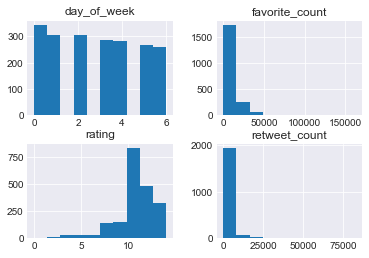

In [431]:
df_clean2.hist()

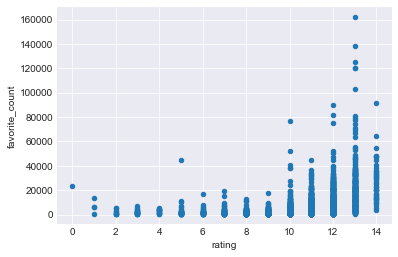

In [432]:
plt.style.use('seaborn-darkgrid')

df_clean2.plot(x = 'rating', y = 'favorite_count', kind = 'scatter')

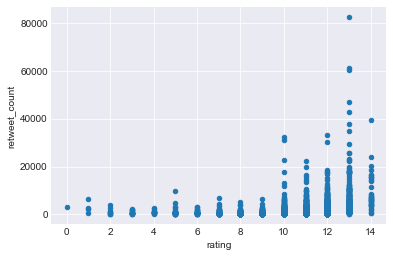

In [433]:
df_clean2.plot(x = 'rating', y = 'retweet_count', kind = 'scatter')

In [434]:
import matplotlib.pyplot as plt



df_clean.plot(df_clean2.timestamp.astype('O'), df_clean.retweet_count)

KeyError: "None of [DatetimeIndex(['2017-08-01', '2017-08-01', '2017-07-31', '2017-07-30',\n               '2017-07-29', '2017-07-29', '2017-07-28', '2017-07-28',\n               '2017-07-27', '2017-07-26',\n               ...\n               '2015-11-16', '2015-11-16', '2015-11-16', '2015-11-16',\n               '2015-11-16', '2015-11-16', '2015-11-16', '2015-11-15',\n               '2015-11-15', '2015-11-15'],\n              dtype='datetime64[ns]', length=2051, freq=None)] are in the [columns]"

<BarContainer object of 2051 artists>

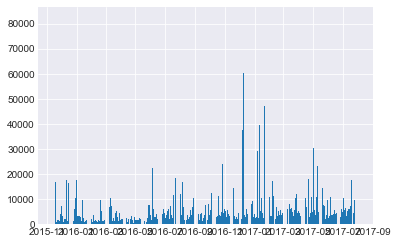

In [435]:

df_time = df_clean2.set_index('timestamp')
#df_clean2.plot(x=df_clean2.favorite_count, y= df_clean2.day_of_week, kind="bar")

#plt.bar(df_time.index, df_time.retweet_count)
plt.bar(df_time.index, df_time.retweet_count)


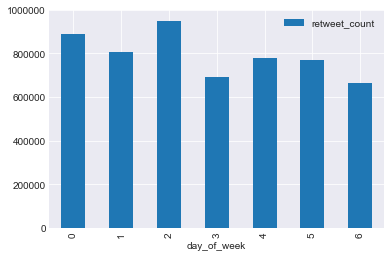

In [436]:
df1 = df_clean2.groupby('day_of_week').sum()[['favorite_count']]
df5.plot(kind = 'bar')

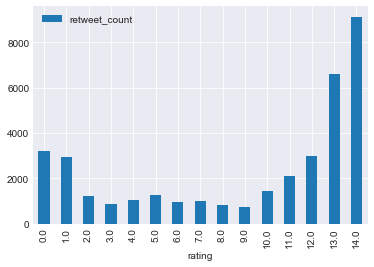

In [437]:
df2 = df_clean2.groupby('rating').mean()[['retweet_count']]
df2.plot(kind = 'bar')

In [438]:
#df4 = df_clean2[df_clean2.stage.str.contains(r'(doggo|floofer|pupper|puppo)')]

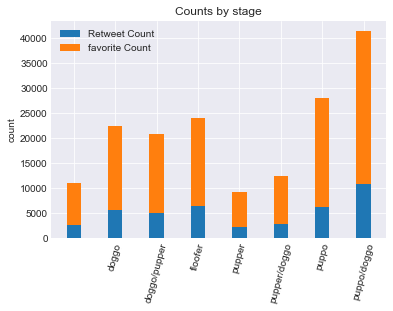

,retweet_count,favorite_count
stage,,
,2551.167447,8397.885831
doggo,5664.148649,16754.324324
doggo/pupper,5104.400000,15695.000000
floofer,6440.500000,17654.000000
pupper,2297.777293,6948.244541
pupper/doggo,2815.000000,9527.000000
puppo,6202.259259,21786.851852


In [439]:
import numpy as np
df4 = df_clean2.groupby('stage').mean()[['retweet_count', 'favorite_count']]
#df4.plot(kind = 'bar')
#df4 = df4.set_index('stage')

    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(df4.index, df4.retweet_count, width)
p2 = plt.bar(df4.index, df4.favorite_count, width, bottom= df4.retweet_count)

plt.ylabel('count')
plt.title('Counts by stage')
plt.xticks(ind, rotation=75)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Retweet Count', 'favorite Count'))

plt.show()

df4.head(7)

In [440]:
breed = df_clean2.groupby( 'breed').count().nlargest(10, 'tweet_id')
breed.reset_index(inplace = True)
df_breed= df_clean2[df_clean2['breed'].isin(breed['breed'])]


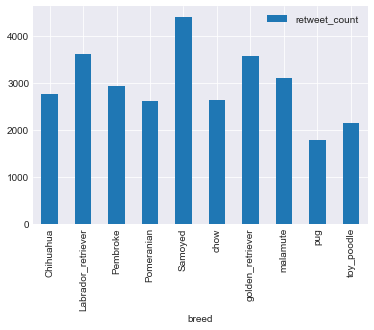

In [441]:
df_breed1 = df_breed.groupby('breed').mean()[['retweet_count']]
df_breed1.plot(kind = 'bar')


In [442]:
df_clean2[df_clean2.retweet_count== df_clean2.retweet_count.max()]

,tweet_id,timestamp,source,expanded_urls,name,text,retweet_count,favorite_count,stage,rating,breed,day_of_week
812,744234799360020481,2016-06-18,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/744234799...,None,Here's a doggo realizing you can stand in a po...,82530,162285,doggo,13.0,Labrador_retriever,5


In [444]:
df_clean2.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1923
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64